## 데이터로드

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [63]:
# 데이터를 구분하는 문자를 지정하는 옵션
# 제목만 전처리한 항목
vod = pd.read_csv('../data/전처리data/vod_prepro_series_nm.csv')
con = pd.read_csv('../data/전처리data/con_prepro_series_nm.csv', encoding='cp949')

In [64]:
# 필요한 column
vod_ex = vod[['subsr', 'rename', 'Category', 'strt_dt', 'use_tms', 'disp_rtm', 'vod_id']]
vod_ex

# 중복 확인
vod_ex[vod_ex.duplicated()]

# column명 바꾸기
vod_ex.rename(columns={'strt_dt' : 'log_dt'}, inplace=True)
vod_ex

C:\Users\user\AppData\Local\Temp\ipykernel_19732\2476289834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_ex.rename(columns={'strt_dt' : 'log_dt'}, inplace=True)


,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id
0,65941000,그것이알고싶다,TV프로그램,20230812163507,80.0,80,297
1,66873000,그것이알고싶다,TV프로그램,20230816205227,80.0,80,297
2,66873000,그것이알고싶다,TV프로그램,20230829194727,12.0,80,297
3,61689000,그것이알고싶다,TV프로그램,20230813130609,80.0,80,297
4,61619000,꼬리에꼬리를무는그날이야기,TV프로그램,20230804092737,69.7,73,8
...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,20230914211110,6.0,6,3674
10157,66317000,알사탕,키즈,20230903223544,8.0,8,3671
10158,66317000,알사탕,키즈,20230903223210,3.3,8,3671
10159,66900000,월간아기상어,키즈,20230904120057,0.8,1,406


In [65]:
# 필요한 column
con_ex = con[['subsr', 'rename', 'Category', 'log_dt', 'vod_id']]

# 중복 확인
con_ex[con_ex.duplicated()]
con_ex = con_ex.drop_duplicates().reset_index(drop=True)
con_ex

,subsr,rename,Category,log_dt,vod_id
0,65968000,핑크퐁동물동요,키즈,20230813071155,882
1,65968000,핑크퐁동물동요,키즈,20230813071215,882
2,63086000,지니강이플러스시즌7,키즈,20230827145542,1622
3,63086000,지니강이플러스시즌9,키즈,20230827152417,2043
4,62733000,엘리가간다시즌12,키즈,20230816112816,1958
...,...,...,...,...,...
21100,64551000,슈퍼토끼,키즈,20230930121657,544
21101,64551000,슈퍼토끼,키즈,20230930121654,544
21102,64551000,슈퍼토끼,키즈,20230930121656,544
21103,64551000,슈퍼토끼,키즈,20230930121646,544


In [66]:
# vod - watched, con - click
vod_ex['type'] = 'watched'
con_ex['type'] = 'click'

C:\Users\user\AppData\Local\Temp\ipykernel_19732\190279175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_ex['type'] = 'watched'


In [67]:
vod_ex

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type
0,65941000,그것이알고싶다,TV프로그램,20230812163507,80.0,80,297,watched
1,66873000,그것이알고싶다,TV프로그램,20230816205227,80.0,80,297,watched
2,66873000,그것이알고싶다,TV프로그램,20230829194727,12.0,80,297,watched
3,61689000,그것이알고싶다,TV프로그램,20230813130609,80.0,80,297,watched
4,61619000,꼬리에꼬리를무는그날이야기,TV프로그램,20230804092737,69.7,73,8,watched
...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,20230914211110,6.0,6,3674,watched
10157,66317000,알사탕,키즈,20230903223544,8.0,8,3671,watched
10158,66317000,알사탕,키즈,20230903223210,3.3,8,3671,watched
10159,66900000,월간아기상어,키즈,20230904120057,0.8,1,406,watched


In [68]:
con_ex

,subsr,rename,Category,log_dt,vod_id,type
0,65968000,핑크퐁동물동요,키즈,20230813071155,882,click
1,65968000,핑크퐁동물동요,키즈,20230813071215,882,click
2,63086000,지니강이플러스시즌7,키즈,20230827145542,1622,click
3,63086000,지니강이플러스시즌9,키즈,20230827152417,2043,click
4,62733000,엘리가간다시즌12,키즈,20230816112816,1958,click
...,...,...,...,...,...,...
21100,64551000,슈퍼토끼,키즈,20230930121657,544,click
21101,64551000,슈퍼토끼,키즈,20230930121654,544,click
21102,64551000,슈퍼토끼,키즈,20230930121656,544,click
21103,64551000,슈퍼토끼,키즈,20230930121646,544,click


### score 생성

In [69]:
# 정렬
vod_all_list = pd.concat([vod_ex, con_ex], ignore_index = True).sort_values('log_dt')
vod_all_list

# 중복 확인
vod_all_list[vod_all_list.duplicated()]

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type


In [70]:
# category가 영화인 컬럼만 선택
vod_list = vod_all_list[vod_all_list['Category'] == '키즈']
vod_list

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type
5248,66540000,잠자는숲속의공주,키즈,20230801011333,0.0,6.0,689,watched
5247,66504000,잠자는숲속의공주,키즈,20230801082444,0.2,6.0,689,watched
10189,66449000,출동!슈퍼윙스5,키즈,20230801142948,NaN,NaN,1502,click
10227,66449000,출동!슈퍼윙스6,키즈,20230801142958,NaN,NaN,4625,click
10201,66449000,출동!슈퍼윙스3,키즈,20230801143007,NaN,NaN,1578,click
...,...,...,...,...,...,...,...,...
31263,64551000,슈퍼토끼,키즈,20230930121656,NaN,NaN,544,click
31261,64551000,슈퍼토끼,키즈,20230930121657,NaN,NaN,544,click
10071,64551000,지니강이플러스시즌2,키즈,20230930123557,3.2,18.0,50,watched
31201,61592000,오싹오싹이야기시즌2,키즈,20230930154704,NaN,NaN,3705,click


In [71]:
vod_list['log_dt'] = pd.to_datetime(vod_list['log_dt'], format='%Y%m%d%H%M%S')

vod_list

C:\Users\user\AppData\Local\Temp\ipykernel_19732\3660842791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_list['log_dt'] = pd.to_datetime(vod_list['log_dt'], format='%Y%m%d%H%M%S')


,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type
5248,66540000,잠자는숲속의공주,키즈,2023-08-01 01:13:33,0.0,6.0,689,watched
5247,66504000,잠자는숲속의공주,키즈,2023-08-01 08:24:44,0.2,6.0,689,watched
10189,66449000,출동!슈퍼윙스5,키즈,2023-08-01 14:29:48,NaN,NaN,1502,click
10227,66449000,출동!슈퍼윙스6,키즈,2023-08-01 14:29:58,NaN,NaN,4625,click
10201,66449000,출동!슈퍼윙스3,키즈,2023-08-01 14:30:07,NaN,NaN,1578,click
...,...,...,...,...,...,...,...,...
31263,64551000,슈퍼토끼,키즈,2023-09-30 12:16:56,NaN,NaN,544,click
31261,64551000,슈퍼토끼,키즈,2023-09-30 12:16:57,NaN,NaN,544,click
10071,64551000,지니강이플러스시즌2,키즈,2023-09-30 12:35:57,3.2,18.0,50,watched
31201,61592000,오싹오싹이야기시즌2,키즈,2023-09-30 15:47:04,NaN,NaN,3705,click


In [72]:
vod_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 5248 to 10072
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   subsr     660 non-null    int64         
 1   rename    660 non-null    object        
 2   Category  660 non-null    object        
 3   log_dt    660 non-null    datetime64[ns]
 4   use_tms   501 non-null    float64       
 5   disp_rtm  501 non-null    float64       
 6   vod_id    660 non-null    int64         
 7   type      660 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 46.4+ KB


subsr, rename, Category 기준으로 같은 것 개수 세기

In [73]:
conditions = [
    vod_list['type'] == 'click',
    vod_list['type'] == 'watched'
]

choices = [1, 2]

vod_list['Weight'] = np.select(conditions, choices, default='0')

# type 변환 
vod_list['Weight'] = pd.to_numeric(vod_list['Weight'])
vod_list

C:\Users\user\AppData\Local\Temp\ipykernel_19732\3834990940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_list['Weight'] = np.select(conditions, choices, default='0')
C:\Users\user\AppData\Local\Temp\ipykernel_19732\3834990940.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_list['Weight'] = pd.to_numeric(vod_list['Weight'])


,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight
5248,66540000,잠자는숲속의공주,키즈,2023-08-01 01:13:33,0.0,6.0,689,watched,2
5247,66504000,잠자는숲속의공주,키즈,2023-08-01 08:24:44,0.2,6.0,689,watched,2
10189,66449000,출동!슈퍼윙스5,키즈,2023-08-01 14:29:48,NaN,NaN,1502,click,1
10227,66449000,출동!슈퍼윙스6,키즈,2023-08-01 14:29:58,NaN,NaN,4625,click,1
10201,66449000,출동!슈퍼윙스3,키즈,2023-08-01 14:30:07,NaN,NaN,1578,click,1
...,...,...,...,...,...,...,...,...,...
31263,64551000,슈퍼토끼,키즈,2023-09-30 12:16:56,NaN,NaN,544,click,1
31261,64551000,슈퍼토끼,키즈,2023-09-30 12:16:57,NaN,NaN,544,click,1
10071,64551000,지니강이플러스시즌2,키즈,2023-09-30 12:35:57,3.2,18.0,50,watched,2
31201,61592000,오싹오싹이야기시즌2,키즈,2023-09-30 15:47:04,NaN,NaN,3705,click,1


In [74]:
# 계정별 동일 프로그램명 개수 count
vod_count = vod_list.groupby(['subsr', 'rename', 'Category', 'vod_id'])['Weight'].sum().reset_index()
vod_count.columns = ['subsr', 'rename', 'Category', 'vod_id', 'Affinity']
vod_count

,subsr,rename,Category,vod_id,Affinity
0,59906000,뽀롱뽀롱뽀로로시즌6,키즈,1617,1
1,59906000,아기상어올리와윌리엄2,키즈,3494,1
2,59917000,라바인뉴욕,키즈,10,1
3,59917000,브레드이발소,키즈,2310,1
4,60040000,포켓몬스터:리코와로드의모험,키즈,1273,1
...,...,...,...,...,...
291,67106000,라바시즌1,키즈,55,4
292,67106000,자이언트펭TV,키즈,4412,2
293,67140000,잠자는숲속의공주,키즈,689,4
294,67148000,잠자는숲속의공주,키즈,689,4


In [75]:
# 최근에 시청한 vod에 가중치 - timedecay
T = 60

t_ref = pd.to_datetime(vod_list['log_dt'], "").max()

In [76]:
t_ref

Timestamp('2023-09-30 18:33:37')

In [77]:
# Timedecay 생성 

vod_list['Timedecay'] = vod_list.apply(
    lambda x: x['Weight'] * np.power(0.5, (t_ref - pd.to_datetime(x['log_dt'])).days / T),
    axis=1
)
vod_list

C:\Users\user\AppData\Local\Temp\ipykernel_19732\127953402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_list['Timedecay'] = vod_list.apply(


,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight,Timedecay
5248,66540000,잠자는숲속의공주,키즈,2023-08-01 01:13:33,0.0,6.0,689,watched,2,1.0
5247,66504000,잠자는숲속의공주,키즈,2023-08-01 08:24:44,0.2,6.0,689,watched,2,1.0
10189,66449000,출동!슈퍼윙스5,키즈,2023-08-01 14:29:48,NaN,NaN,1502,click,1,0.5
10227,66449000,출동!슈퍼윙스6,키즈,2023-08-01 14:29:58,NaN,NaN,4625,click,1,0.5
10201,66449000,출동!슈퍼윙스3,키즈,2023-08-01 14:30:07,NaN,NaN,1578,click,1,0.5
...,...,...,...,...,...,...,...,...,...,...
31263,64551000,슈퍼토끼,키즈,2023-09-30 12:16:56,NaN,NaN,544,click,1,1.0
31261,64551000,슈퍼토끼,키즈,2023-09-30 12:16:57,NaN,NaN,544,click,1,1.0
10071,64551000,지니강이플러스시즌2,키즈,2023-09-30 12:35:57,3.2,18.0,50,watched,2,2.0
31201,61592000,오싹오싹이야기시즌2,키즈,2023-09-30 15:47:04,NaN,NaN,3705,click,1,1.0


In [78]:
vod_list[vod_list['rename'] == '엘리멘탈']

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight,Timedecay


In [79]:
# subsr, series_nm별 affinity 합
data2_wt = vod_list.groupby(['subsr', 'rename', 'Category', 'vod_id'])['Timedecay'].sum().reset_index()
data2_wt.columns = ['subsr', 'rename', 'Category', 'vod_id', 'Affinity']
data2_wt

,subsr,rename,Category,vod_id,Affinity
0,59906000,뽀롱뽀롱뽀로로시즌6,키즈,1617,0.500000
1,59906000,아기상어올리와윌리엄2,키즈,3494,0.644685
2,59917000,라바인뉴욕,키즈,10,0.831238
3,59917000,브레드이발소,키즈,2310,0.831238
4,60040000,포켓몬스터:리코와로드의모험,키즈,1273,0.911722
...,...,...,...,...,...
291,67106000,라바시즌1,키즈,55,2.639016
292,67106000,자이언트펭TV,키즈,4412,1.319508
293,67140000,잠자는숲속의공주,키즈,689,3.402669
294,67148000,잠자는숲속의공주,키즈,689,3.267885


In [80]:
data2_wt[data2_wt.duplicated()]

,subsr,rename,Category,vod_id,Affinity


In [81]:
data2_wt['Affinity'].sort_values()

0       0.500000
80      0.505810
29      0.505810
174     0.517632
290     0.574349
         ...    
90     26.496860
108    31.160447
92     31.632449
134    39.540561
84     50.451528
Name: Affinity, Length: 296, dtype: float64

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
# 로그 변환 적용
data2_wt['Affinity'] = np.log1p(data2_wt['Affinity'])
# Min-Max 스케일링 적용
# scaler = MinMaxScaler(feature_range=(0,1))
# c_score['Affinity'] = scaler.fit_transform(c_score[['Affinity']])
# 스케일링된 값 정수로 변환
# c_score['Affinity'] = c_score['Affinity'].round().astype(int)
# 결과 확인
score = data2_wt.copy()
score

,subsr,rename,Category,vod_id,Affinity
0,59906000,뽀롱뽀롱뽀로로시즌6,키즈,1617,0.405465
1,59906000,아기상어올리와윌리엄2,키즈,3494,0.497549
2,59917000,라바인뉴욕,키즈,10,0.604992
3,59917000,브레드이발소,키즈,2310,0.604992
4,60040000,포켓몬스터:리코와로드의모험,키즈,1273,0.648005
...,...,...,...,...,...
291,67106000,라바시즌1,키즈,55,1.291713
292,67106000,자이언트펭TV,키즈,4412,0.841355
293,67140000,잠자는숲속의공주,키즈,689,1.482211
294,67148000,잠자는숲속의공주,키즈,689,1.451118


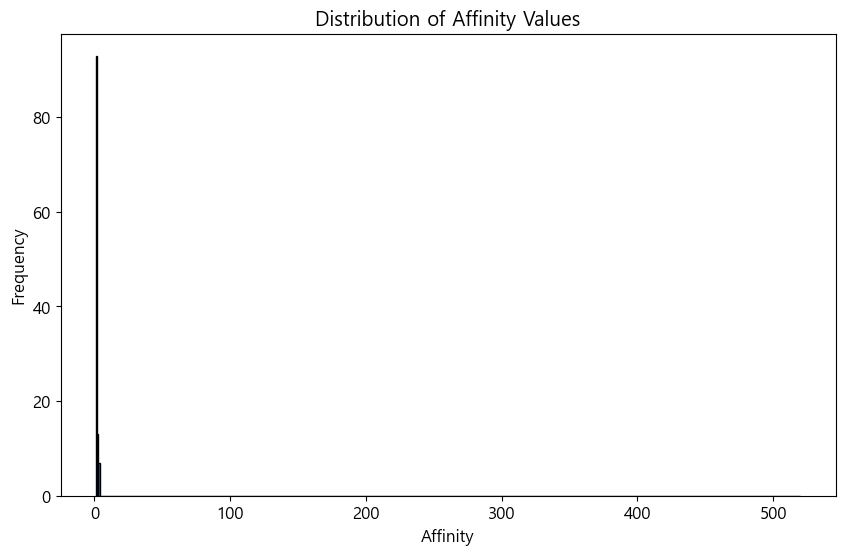

In [83]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(score['Affinity'], bins=520, range=(1, 520), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()

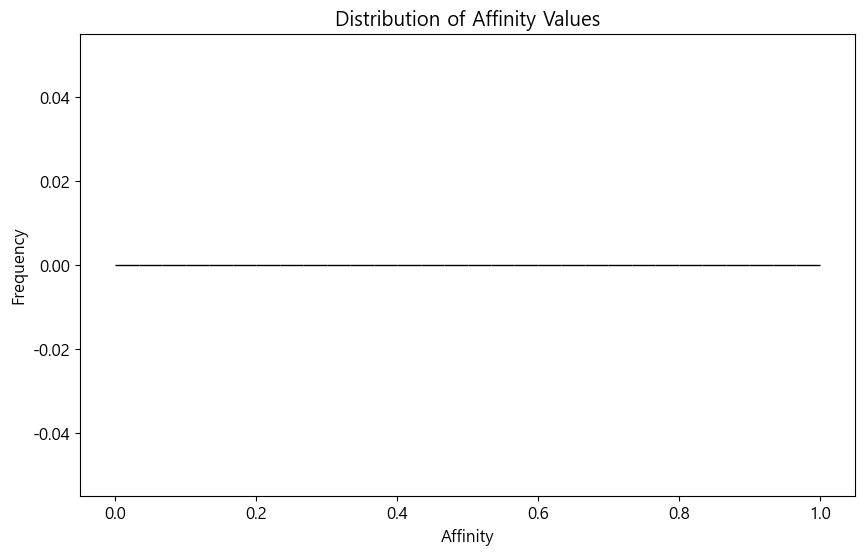

In [84]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(score[score['subsr']==66873000].Affinity, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()

subsr별 평점 만들기

In [85]:
# subsr별 affinity range 확인 
affinity_range = score.groupby('subsr')['Affinity'].agg(['min', 'max'])
affinity_range

,min,max
subsr,,
59906000,0.405465,0.497549
59917000,0.604992,0.604992
60040000,0.648005,0.648005
60169000,0.986486,0.986486
60338000,0.515918,1.600207
...,...,...
67070000,1.061216,1.061216
67083000,0.453842,0.453842
67106000,0.841355,1.291713


In [86]:
# 5개 구간으로 나눔
def assign_ratings(row):
    min_affinity, max_affinity = affinity_range.loc[row['subsr']]
    
    # min과 max가 같은 경우, 모든 값에 3을 부여
    if min_affinity == max_affinity:
        return 5
    
    interval = (max_affinity - min_affinity) / 5
    rating = np.ceil((row['Affinity'] - min_affinity) / interval)
    return min(max(rating, 1), 5)

In [87]:
score['ratings'] = score.apply(assign_ratings, axis=1)
score

,subsr,rename,Category,vod_id,Affinity,ratings
0,59906000,뽀롱뽀롱뽀로로시즌6,키즈,1617,0.405465,1.0
1,59906000,아기상어올리와윌리엄2,키즈,3494,0.497549,5.0
2,59917000,라바인뉴욕,키즈,10,0.604992,5.0
3,59917000,브레드이발소,키즈,2310,0.604992,5.0
4,60040000,포켓몬스터:리코와로드의모험,키즈,1273,0.648005,5.0
...,...,...,...,...,...,...
291,67106000,라바시즌1,키즈,55,1.291713,5.0
292,67106000,자이언트펭TV,키즈,4412,0.841355,1.0
293,67140000,잠자는숲속의공주,키즈,689,1.482211,5.0
294,67148000,잠자는숲속의공주,키즈,689,1.451118,1.0


In [88]:
score[score.duplicated()]

,subsr,rename,Category,vod_id,Affinity,ratings


In [89]:
score['ratings'].value_counts()

1.0    149
5.0    102
2.0     21
3.0     15
4.0      9
Name: ratings, dtype: int64

In [90]:
score.to_csv('../data/전처리data/c_score_kids.csv', index=False)